<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-2-Build/blob/master/Build_Week_Unit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in datasets

In [1]:
import pandas as pd
# Remember to upload data to unit 2 build
!git clone https://github.com/skredenmathias/DS-Unit-1-Build.git
path = '/content/DS-Unit-1-Build/'

Cloning into 'DS-Unit-1-Build'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [0]:

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
year_2016 = pd.read_excel(path+'2016 complete match data OraclesElixir 2018-12-18.xlsx')
year_2016.shape

(19824, 84)

In [3]:
year_2017 = pd.read_excel(path+'2017matchdataOraclesElixir.xlsx')
year_2017.shape

(37404, 98)

In [4]:
spring_2018 = pd.read_excel(path+'2018-spring-match-data-OraclesElixir-2018-05-20.xlsx')
spring_2018.shape

(15900, 98)

In [5]:
summer_2018 = pd.read_excel(path+'2018 summer match data OraclesElixir 2018-09-27.xlsx')
summer_2018.shape

(16188, 98)

In [6]:
worlds_2018 = pd.read_excel(path+'2018-worlds-match-data-OraclesElixir-2018-11-03.xlsx')
worlds_2018.shape

(1428, 98)

In [7]:
spring_2019 = pd.read_excel(path+'2019-spring-match-data-OraclesElixir-2019-05-21.xlsx')
spring_2019.shape

(12864, 98)

In [8]:
summer_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-09-16.xlsx')
summer_2019.shape

(12612, 98)

In [12]:
worlds_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')
worlds_2019.shape

(1428, 98)

# Merging dataframes

In [13]:
# Merging dataframes 1/2
dfs = [year_2017, spring_2018, summer_2018, worlds_2018, spring_2019, summer_2019, worlds_2019]
# Not including year_2016 due to several missing columns

# Concatenating
test = pd.concat(dfs)
test.shape

(97824, 98)

# Data Cleaning

In [14]:
def wrangle(X):
  X = X.copy()

  excess_columns = ['url','date','week', 'playerid','position','player','champion','ban1','ban2','ban3','ban4','ban5','k','d','a','doubles','triples','quadras','pentas','fb','fbassist', 'fbvictim', 'kpm','okpm',
                       'fd','heraldtime','dmgtochamps','dmgshare','earnedgoldshare','wards','wardshare','wardkills','visionwards','visionwardbuys','visiblewardclearrate','invisiblewardclearrate','totalgold','minionkills',
                       'monsterkills', 'monsterkillsownjungle','monsterkillsenemyjungle','goldat10','oppgoldat10','goldat15','oppgoldat15','xpat10','oppxpat10','csat10','oppcsat10','csat15','oppcsat15']
  X = X.drop(columns = excess_columns)
  return X

df = wrangle(test)
df.shape

(97824, 47)

In [15]:
# Removing excess drake columns, and HERALD

def wrangle2(X):
  X = X.copy()

  difficult_columns = ['elementals','oppelementals','firedrakes','waterdrakes',
                       'earthdrakes','airdrakes', 'herald']
  X = X.drop(columns = difficult_columns)
  return X

df = wrangle2(df)
df.shape

(97824, 40)

In [16]:
# Remove LPL games from dataframe, due to excess NaN values
LPL1 = df['league'] == 'LPL'
LPL = df[LPL1]

df = pd.concat([df, LPL]).drop_duplicates(keep=False)
df.shape

(75396, 40)

In [17]:
# Remove rows with NaN values
df = df.copy()
df = df.dropna()
df.shape

(72238, 40)

# Data Exploration

In [18]:
df.head(10)

,gameid,league,split,game,patchno,side,team,gamelength,result,teamkills,teamdeaths,fbtime,ckpm,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,343.729481,0.551543,0.078792,224.749048,9025.0,0.028090,9.258043,114.0,123.0,-8.0,5.0,14.0
1,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,169.402495,0.590939,0.118188,164.827840,6650.0,-0.241322,4.451740,53.0,-756.0,-27.0,0.0,-17.0
2,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,263.873933,0.630335,0.157584,241.177150,8700.0,-0.171789,9.809586,-22.0,-1050.0,-81.0,1.0,-1.0
3,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,408.417597,0.393959,0.039396,184.919764,8275.0,-0.191257,7.367039,-354.0,-1057.0,157.0,-7.0,-16.0
4,1002300127,NALCS,2017-2,3,7.15,Blue,Team Liquid,25.383333,0,3.0,18.0,6.73213,0.827315,11.9418,0.0,2.0,0.0,0.0,1.0,12.368267,0.0,0,4.0,10.0,0.0,21.536467,0.0,1.0,89.389363,0.827315,0.315167,120.822587,6880.0,-0.092862,0.472751,-133.0,-1114.0,-223.0,3.0,5.0
5,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,313.079448,0.551543,0.236376,298.577019,8775.0,-0.028090,9.218647,-114.0,-123.0,8.0,-5.0,-14.0
6,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,374.773473,0.630335,0.393959,256.462771,8475.0,0.241322,4.766907,-53.0,756.0,27.0,0.0,17.0
7,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,818.411031,0.275772,0.078792,356.489035,10335.0,0.171789,8.588313,22.0,1050.0,81.0,-1.0,1.0
8,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,539.290873,0.433355,0.118188,342.227708,10025.0,0.191257,9.179251,354.0,1057.0,-157.0,7.0,16.0
9,1002300127,NALCS,2017-2,3,7.15,Red,Dignitas,25.383333,1,18.0,3.0,6.73213,0.827315,11.9418,2.0,0.0,0.0,0.0,0.0,12.368267,1.0,1,10.0,4.0,1.0,21.536467,1.0,0.0,101.405121,1.339462,0.236376,242.162049,7550.0,0.092862,0.315167,133.0,1114.0,223.0,-3.0,-5.0


In [19]:
df['split'].value_counts()

2017-2      12048
2017-1      11760
2018-1      10296
2018-2       9142
2019-1       7752
2019-2       6552
2017-2po     1464
2018-2p      1452
2018-1P      1440
2017-W       1380
2019-W       1380
2017-1po     1344
2018-W       1344
2019-2P      1008
2017-2pr      900
2019-1P       864
2017-2rq      564
2018-2rq      540
2019-2RQ      528
2017-1pr      480
Name: split, dtype: int64

# Reducing dimensionality

## Grouping by 'gameid'

In [82]:
x = df.groupby(['gameid','team'])['result'].mean()
x = x.reset_index()
x.columns = ['gameid','team','result']
print(x.shape)
x.head(10) 
# .. teamA, team B, 1/0 -> A/B win. (0 and 1 represent A and B)
# A/B should be fine with models
# .. iterate 2 rows at a time 
# merge after merge y

(12038, 3)


,gameid,team,result
0,136,Tempo Storm,1
1,136,eUnited,0
2,143,Delta Fox,1
3,143,Team Gates,0
4,144,Tempo Storm,0
5,144,eUnited,1
6,149,Big Gods Jackals,1
7,149,Gold Coin United,0
8,150,Delta Fox,1
9,150,Team Gates,0


## Finding the all time average stats per team

In [79]:
y = df.groupby(['team'])['league', 'game', 'patchno', 'side',
       'gamelength', 'result', 'teamkills', 'teamdeaths', 'fbtime', 'ckpm',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15'].mean()
       
y = y.reset_index()
y.columns = ['team','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(y.shape)
y.head()

(166, 32)


,team,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,8.466061,36.394276,0.484848,10.242424,10.323232,10.411318,1.858586,2.323232,0.057239,0.067340,0.545455,13.742046,0.434343,6.151515,6.444444,0.444444,26.781731,0.787879,0.848485,580.334028,1.122773,0.519087,364.389580,19713.090909,-0.012831,11.039376,-42.212121,-115.245791,20.239057,-2.562290,-4.841751
1,100 Thieves Academy,8.087317,33.209756,0.463415,10.243902,11.219512,11.266693,1.609756,1.731707,0.024390,0.016260,0.414634,11.899007,0.390244,5.829268,6.317073,0.439024,26.088115,0.585366,0.707317,586.893949,1.184080,0.442289,365.683060,17928.024390,-0.013544,11.354436,-6.975610,-184.487805,-38.487805,-1.536585,-2.902439
2,17 Academy,7.170000,36.974074,0.333333,9.777778,13.333333,17.240446,1.000000,1.888889,0.037037,0.074074,0.333333,14.233174,0.444444,4.888889,7.444444,0.444444,25.370593,0.777778,1.000000,556.900503,1.292819,0.503088,369.089153,20150.259259,-0.021903,10.766707,39.481481,-327.222222,-6.444444,0.629630,-0.333333
3,AHQ Fighter,7.170000,30.850000,0.600000,9.300000,9.300000,17.370332,1.300000,1.100000,0.000000,0.000000,0.600000,15.022647,0.500000,6.100000,5.300000,0.600000,24.357650,0.800000,0.500000,556.228714,1.210518,0.462923,373.537038,16308.966667,-0.005458,10.704992,-200.766667,26.200000,-147.633333,-0.700000,-0.966667
4,AHQ e-Sports Club,8.100568,35.462445,0.519651,11.257642,10.855895,11.844584,2.030568,1.877729,0.045124,0.046579,0.532751,14.379828,0.593886,6.183406,5.755459,0.532751,26.902978,0.772926,0.751092,597.573222,1.240369,0.559982,381.063457,19504.919942,0.012274,11.107435,14.796215,30.882096,8.503639,0.491994,1.224163


## Merging with 'gameid'. 2 rows per game, stats are average for all-time

In [86]:
# Merge x + y on 'team'
df4 = pd.merge(x, y, on='team')
print(df4.shape)
df4.head() # If we keep split we can make it a little more interesting.
# Use this as a baseline after removing a column or three.

(12038, 34)


,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
1,144,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
2,20064,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
3,20068,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
4,20362,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.52381,12.565649,0.52381,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524


In [95]:
df6 = df4.sort_values('gameid')
df6.head()

,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.523810,12.565649,0.523810,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524
42,136,eUnited,0,7.093333,34.770899,0.603175,14.015873,12.428571,13.687389,1.603175,1.539683,0.026455,0.037037,0.460317,13.065528,0.555556,6.920635,5.174603,0.555556,26.850763,0.809524,0.539683,706.027079,1.088394,0.409494,395.055800,19258.973545,0.025116,10.478285,26.597884,87.947090,10.068783,0.317460,0.910053
105,143,Delta Fox,1,7.088710,34.272581,0.193548,11.193548,18.000000,12.393216,1.064516,2.451613,0.053763,0.064516,0.322581,11.199691,0.322581,3.806452,8.677419,0.161290,26.459786,0.419355,1.064516,597.393878,0.964238,0.313753,340.140381,18404.086022,-0.088033,9.774593,-283.827957,-673.225806,-204.559140,-5.978495,-9.462366
136,143,Team Gates,0,7.024000,35.450000,0.000000,7.200000,15.600000,9.995058,0.900000,3.300000,0.033333,0.133333,0.100000,11.034217,0.000000,1.300000,10.000000,0.200000,26.871108,0.300000,1.400000,464.373127,1.017214,0.349491,298.945990,17431.566667,-0.200612,9.935096,-430.000000,-1003.800000,-287.066667,-8.866667,-16.933333
1,144,Tempo Storm,0,7.090714,35.934524,0.571429,10.809524,11.357143,12.731892,1.904762,1.809524,0.079365,0.047619,0.523810,12.565649,0.523810,6.738095,6.142857,0.595238,27.723915,0.809524,0.761905,635.381005,1.135706,0.364791,381.887702,19544.460317,0.019232,10.499576,51.063492,118.277778,-39.936508,-0.174603,0.809524


In [127]:
len(new_df)

68

## Merging our two rows per game into one

In [0]:
# new_df = []
new_df = pd.DataFrame(pd.concat([df6.iloc[0], df6.iloc[1]])).T
for i in range(2, len(df6), 2):
  row = pd.DataFrame(pd.concat([df6.iloc[i], df6.iloc[i+1]])).T
  new_df = pd.concat([new_df, row])

In [171]:
# pd.DataFrame(new_df).T
new_df.head()

,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15,gameid,team,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,Tempo Storm,1,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,136,eUnited,0,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053
0,143,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,143,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333
0,144,Tempo Storm,0,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,144,eUnited,1,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053
0,149,Gold Coin United,0,7.08973,37.5854,0.616438,12.5068,9.63014,13.0466,2.09589,1.67123,0.0684932,0.0639269,0.643836,13.0935,0.643836,7.32877,5.38356,0.643836,28.822,0.986301,0.575342,662.863,1.0909,0.442733,390.925,20659.1,0.0302383,10.5156,114.53,228.511,100.16,4.07763,5.30137,149,Big Gods Jackals,1,7.08765,35.3951,0.352941,11.2647,14.5588,12.1321,1.79412,1.76471,0.0588235,0.0490196,0.558824,11.4632,0.323529,5.05882,7.38235,0.352941,26.9631,0.529412,0.882353,671.514,1.12087,0.360211,347.862,18666.6,-0.0587239,9.96767,-66.951,-186.833,-47.098,-2.34314,-3.78431
0,150,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,150,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333


In [143]:
new_df.shape

(6019, 68)

In [0]:

new_df.columns = ['gameid_a', 'team_a', 'result_a', 'patchno_a', 'gamelength_a', 'result_y_a',
       'teamkills_a', 'teamdeaths_a', 'fdtime_a', 'teamdragkills_a', 'oppdragkills_a',
       'elders_a', 'oppelders_a', 'ft_a', 'fttime_a', 'firstmidouter_a',
       'teamtowerkills_a', 'opptowerkills_a', 'fbaron_a', 'fbarontime_a',
       'teambaronkills_a', 'oppbaronkills_a', 'dmgtochampsperminute_a', 'wpm_a',
       'wcpm_a', 'earnedgpm_a', 'goldspent_a', 'gspd_a', 'cspm_a', 'gdat10_a', 'gdat15_a',
       'xpdat10_a', 'csdat10_a', 'csdat15_a', 'gameid_b', 'team_b', 'result_b',
       'patchno_b', 'gamelength_b', 'result_y_b', 'teamkills_b', 'teamdeaths_b',
       'fdtime_b', 'teamdragkills_b', 'oppdragkills_b', 'elders_b', 'oppelders_b', 'ft_b',
       'fttime_b', 'firstmidouter_b', 'teamtowerkills_b', 'opptowerkills_b', 'fbaron_b',
       'fbarontime_b', 'teambaronkills_b', 'oppbaronkills_b', 'dmgtochampsperminute_b',
       'wpm_b', 'wcpm_b', 'earnedgpm_b', 'goldspent_b', 'gspd_b', 'cspm_b', 'gdat10_b',
       'gdat15_b', 'xpdat10_b', 'csdat10_b', 'csdat15_b']

In [0]:
new_df['winner'] = new_df['result_a'].apply(lambda x: "A" if x == 1 else "B")

In [154]:
new_df.head()

,gameid_a,team_a,result_a,patchno_a,gamelength_a,result_y_a,teamkills_a,teamdeaths_a,fdtime_a,teamdragkills_a,oppdragkills_a,elders_a,oppelders_a,ft_a,fttime_a,firstmidouter_a,teamtowerkills_a,opptowerkills_a,fbaron_a,fbarontime_a,teambaronkills_a,oppbaronkills_a,dmgtochampsperminute_a,wpm_a,wcpm_a,earnedgpm_a,goldspent_a,gspd_a,cspm_a,gdat10_a,gdat15_a,xpdat10_a,csdat10_a,csdat15_a,gameid_b,team_b,result_b,patchno_b,gamelength_b,result_y_b,teamkills_b,teamdeaths_b,fdtime_b,teamdragkills_b,oppdragkills_b,elders_b,oppelders_b,ft_b,fttime_b,firstmidouter_b,teamtowerkills_b,opptowerkills_b,fbaron_b,fbarontime_b,teambaronkills_b,oppbaronkills_b,dmgtochampsperminute_b,wpm_b,wcpm_b,earnedgpm_b,goldspent_b,gspd_b,cspm_b,gdat10_b,gdat15_b,xpdat10_b,csdat10_b,csdat15_b,winner
0,136,Tempo Storm,1,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,136,eUnited,0,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053,A
0,143,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,143,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,A
0,144,Tempo Storm,0,7.09071,35.9345,0.571429,10.8095,11.3571,12.7319,1.90476,1.80952,0.0793651,0.047619,0.52381,12.5656,0.52381,6.7381,6.14286,0.595238,27.7239,0.809524,0.761905,635.381,1.13571,0.364791,381.888,19544.5,0.0192324,10.4996,51.0635,118.278,-39.9365,-0.174603,0.809524,144,eUnited,1,7.09333,34.7709,0.603175,14.0159,12.4286,13.6874,1.60317,1.53968,0.026455,0.037037,0.460317,13.0655,0.555556,6.92063,5.1746,0.555556,26.8508,0.809524,0.539683,706.027,1.08839,0.409494,395.056,19259,0.025116,10.4783,26.5979,87.9471,10.0688,0.31746,0.910053,B
0,149,Gold Coin United,0,7.08973,37.5854,0.616438,12.5068,9.63014,13.0466,2.09589,1.67123,0.0684932,0.0639269,0.643836,13.0935,0.643836,7.32877,5.38356,0.643836,28.822,0.986301,0.575342,662.863,1.0909,0.442733,390.925,20659.1,0.0302383,10.5156,114.53,228.511,100.16,4.07763,5.30137,149,Big Gods Jackals,1,7.08765,35.3951,0.352941,11.2647,14.5588,12.1321,1.79412,1.76471,0.0588235,0.0490196,0.558824,11.4632,0.323529,5.05882,7.38235,0.352941,26.9631,0.529412,0.882353,671.514,1.12087,0.360211,347.862,18666.6,-0.0587239,9.96767,-66.951,-186.833,-47.098,-2.34314,-3.78431,B
0,150,Delta Fox,1,7.08871,34.2726,0.193548,11.1935,18,12.3932,1.06452,2.45161,0.0537634,0.0645161,0.322581,11.1997,0.322581,3.80645,8.67742,0.16129,26.4598,0.419355,1.06452,597.394,0.964238,0.313753,340.14,18404.1,-0.0880334,9.77459,-283.828,-673.226,-204.559,-5.97849,-9.46237,150,Team Gates,0,7.024,35.45,0,7.2,15.6,9.99506,0.9,3.3,0.0333333,0.133333,0.1,11.0342,0,1.3,10,0.2,26.8711,0.3,1.4,464.373,1.01721,0.349491,298.946,17431.6,-0.200612,9.9351,-430,-1003.8,-287.067,-8.86667,-16.9333,A


In [174]:
# Checking
(new_df['result_a'] + new_df['result_b'])

0    1
0    1
0    1
0    1
0    1
    ..
0    1
0    1
0    1
0    1
0    1
Length: 6019, dtype: object

In [175]:
new_df.shape

(6019, 69)

# Building a fast model for new_df

In [0]:
# Dropping leaky results columns
new_df = new_df.drop(columns=['result_a','result_b', 'gameid_a', 'gameid_b'])

In [0]:
# new_df = new_df.drop(columns=['patchno_a','patchno_b'])

In [0]:
!pip install category_encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Train, test, val split

In [185]:
train, test = train_test_split(new_df, test_size = .2, random_state = 42)
train.shape, test.shape

((4815, 63), (1204, 63))

In [186]:
train, val = train_test_split(train, test_size = .2, random_state = 42)
train.shape, val.shape

((3852, 63), (963, 63))

In [187]:
target = 'winner'

# features = 

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

X_train.shape, X_val.shape

((3852, 62), (963, 62))

In [180]:
# Checking baseline
val['winner'].value_counts(normalize=True)

A    0.502596
B    0.497404
Name: winner, dtype: float64

## Making pipeline + prediction

In [188]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team_a', 'gamelength_a', 'result_y_a',
                                      'teamkills_a', 'teamdeaths_a', 'fdtime_a',
                                      'teamdragkills_a', 'oppdragkills_a',
                                      'elders_a', 'oppelders_a', 'ft_a',
                                      'fttime_a', 'firstmidouter_a',
                                      'teamtowerkills_a', 'opptowerkills_a',
                                      'fbaron_a', 'fbarontime_a',
                                      'teambaronkills_a', 'oppbaronkills_a',
                                      'dmgtocham...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        ma

In [189]:
# Almost 7% better than guessing. Not bad.
y_pred = pipeline.predict(X_val)
print('Validation accuracy: ', pipeline.score(X_val, y_val))

Validation accuracy:  0.5835929387331257


## Checking feature importances

In [167]:
# print('X_train shape before encoding', X_train.shape)

# encoder = pipeline.named_steps['ordinalencoder']
# encoded = encoder.transform(X_train)

# print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (3852, 66)
X_train shape after encoding (3852, 66)


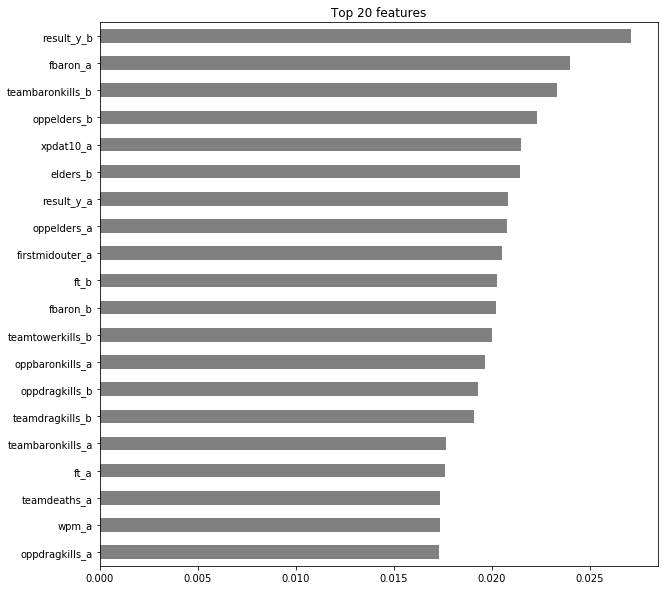

In [234]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, encoded.columns)

importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');


In [0]:
df6['team'].value_counts()

In [0]:
df6[df6['team'] == 'Hong Kong Attitude'].loc[9433]

In [0]:
# josh = pd.DataFrame(pd.concat([df6.iloc[0], df6.iloc[1]])).T
best_team = df6[df6['team'] == 'Funplus Phoenix'].loc[10684]
worst_team = df6[df6['team'] == 'Hong Kong Attitude'].loc[9433]

In [0]:
test_josh = pd.DataFrame(pd.concat([best_team, worst_team])).T

test_josh.columns = ['gameid_a', 'team_a', 'result_a', 'patchno_a', 'gamelength_a', 'result_y_a',
       'teamkills_a', 'teamdeaths_a', 'fdtime_a', 'teamdragkills_a', 'oppdragkills_a',
       'elders_a', 'oppelders_a', 'ft_a', 'fttime_a', 'firstmidouter_a',
       'teamtowerkills_a', 'opptowerkills_a', 'fbaron_a', 'fbarontime_a',
       'teambaronkills_a', 'oppbaronkills_a', 'dmgtochampsperminute_a', 'wpm_a',
       'wcpm_a', 'earnedgpm_a', 'goldspent_a', 'gspd_a', 'cspm_a', 'gdat10_a', 'gdat15_a',
       'xpdat10_a', 'csdat10_a', 'csdat15_a', 'gameid_b', 'team_b', 'result_b',
       'patchno_b', 'gamelength_b', 'result_y_b', 'teamkills_b', 'teamdeaths_b',
       'fdtime_b', 'teamdragkills_b', 'oppdragkills_b', 'elders_b', 'oppelders_b', 'ft_b',
       'fttime_b', 'firstmidouter_b', 'teamtowerkills_b', 'opptowerkills_b', 'fbaron_b',
       'fbarontime_b', 'teambaronkills_b', 'oppbaronkills_b', 'dmgtochampsperminute_b',
       'wpm_b', 'wcpm_b', 'earnedgpm_b', 'goldspent_b', 'gspd_b', 'cspm_b', 'gdat10_b',
       'gdat15_b', 'xpdat10_b', 'csdat10_b', 'csdat15_b']

test_josh = test_josh.drop(columns=['result_a','result_b', 'gameid_a', 'gameid_b',
                                    'patchno_a', 'patchno_b'])
# df6[df6['team'] == 'Splyce'].loc[8185]

In [221]:
test_josh

,team_a,gamelength_a,result_y_a,teamkills_a,teamdeaths_a,fdtime_a,teamdragkills_a,oppdragkills_a,elders_a,oppelders_a,ft_a,fttime_a,firstmidouter_a,teamtowerkills_a,opptowerkills_a,fbaron_a,fbarontime_a,teambaronkills_a,oppbaronkills_a,dmgtochampsperminute_a,wpm_a,wcpm_a,earnedgpm_a,goldspent_a,gspd_a,cspm_a,gdat10_a,gdat15_a,xpdat10_a,csdat10_a,csdat15_a,team_b,gamelength_b,result_y_b,teamkills_b,teamdeaths_b,fdtime_b,teamdragkills_b,oppdragkills_b,elders_b,oppelders_b,ft_b,fttime_b,firstmidouter_b,teamtowerkills_b,opptowerkills_b,fbaron_b,fbarontime_b,teambaronkills_b,oppbaronkills_b,dmgtochampsperminute_b,wpm_b,wcpm_b,earnedgpm_b,goldspent_b,gspd_b,cspm_b,gdat10_b,gdat15_b,xpdat10_b,csdat10_b,csdat15_b
0,Funplus Phoenix,31.2593,0.777778,18.6111,11.0556,8.83047,2.88889,1.22222,0.037037,0.0185185,0.722222,13.0224,0.611111,7.77778,3.94444,0.722222,24.4805,1,0.333333,644.657,1.33213,0.526703,430.054,18224.7,0.0931155,10.6958,158.963,587.556,102.019,-0.740741,0.574074,Splyce,36.0045,0.527363,12.6169,11.8308,11.8196,1.74129,2.07463,0.0547264,0.0547264,0.492537,12.7729,0.432836,6.34826,6.42786,0.472637,26.7283,0.781095,0.865672,623.436,1.21864,0.507084,384.825,19881.9,-0.00708863,10.9902,11.4312,26.5174,-45.8756,-0.776119,-1.15755


In [229]:
pipeline.predict_proba(test_josh)

array([[0.1, 0.9]])

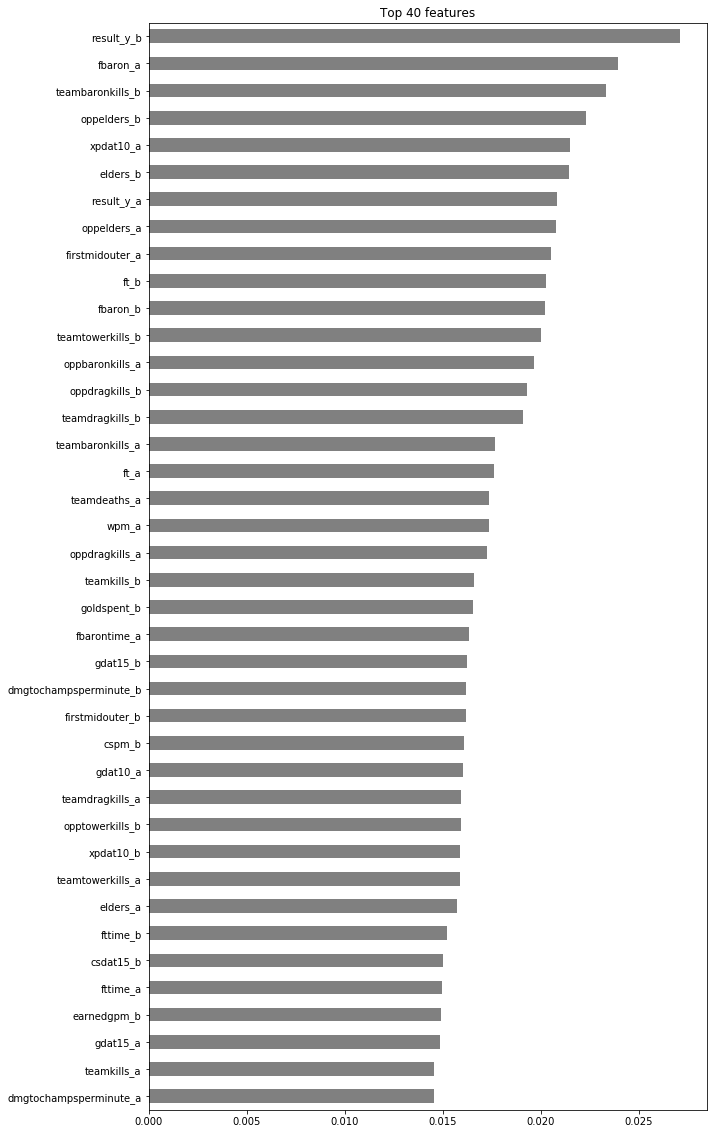

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, encoded.columns)

importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot top n feature importances
n = 40
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

In [0]:
df4 = df4.copy()
df4 = df4.drop(columns='patchno')

In [94]:
df5 = df4.groupby(['gameid'])['team', 'result_x', 'patchno', 'gamelength', 'result_y',
       'teamkills', 'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'ft', 'fttime', 'firstmidouter',
       'teamtowerkills', 'opptowerkills', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochampsperminute', 'wpm',
       'wcpm', 'earnedgpm', 'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15',
       'xpdat10', 'csdat10', 'csdat15'].mean()
       
df5 = df5.reset_index()
df5.columns = [ 'gameid', 'result_x', 'patchno', 'gamelength', 'result_y',
       'teamkills', 'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'ft', 'fttime', 'firstmidouter',
       'teamtowerkills', 'opptowerkills', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochampsperminute', 'wpm',
       'wcpm', 'earnedgpm', 'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15',
       'xpdat10', 'csdat10', 'csdat15']
print(df5.shape)
df5.head()

(5969, 33)


,gameid,result_x,patchno,gamelength,result_y,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,136,0.5,7.092024,35.352712,0.587302,12.412698,11.892857,13.209641,1.753968,1.674603,0.052910,0.042328,0.492063,12.815588,0.539683,6.829365,5.658730,0.575397,27.287339,0.809524,0.650794,670.704042,1.112050,0.387142,388.471751,19401.716931,0.022174,10.488930,38.830688,103.112434,-14.933862,0.071429,0.859788
1,143,0.5,7.056355,34.861290,0.096774,9.196774,16.800000,11.194137,0.982258,2.875806,0.043548,0.098925,0.211290,11.116954,0.161290,2.553226,9.338710,0.180645,26.665447,0.359677,1.232258,530.883502,0.990726,0.331622,319.543186,17917.826344,-0.144323,9.854845,-356.913978,-838.512903,-245.812903,-7.422581,-13.197849
2,144,0.5,7.092024,35.352712,0.587302,12.412698,11.892857,13.209641,1.753968,1.674603,0.052910,0.042328,0.492063,12.815588,0.539683,6.829365,5.658730,0.575397,27.287339,0.809524,0.650794,670.704042,1.112050,0.387142,388.471751,19401.716931,0.022174,10.488930,38.830688,103.112434,-14.933862,0.071429,0.859788
3,149,0.5,7.088687,36.490243,0.484690,11.885778,12.094480,12.589343,1.945004,1.717969,0.063658,0.056473,0.601330,12.278339,0.483683,6.193795,6.382957,0.498388,27.892550,0.757857,0.728848,667.188429,1.105883,0.401472,369.393252,19662.851195,-0.014243,10.241653,23.789350,20.839041,26.530889,0.867244,0.758528
4,150,0.5,7.056355,34.861290,0.096774,9.196774,16.800000,11.194137,0.982258,2.875806,0.043548,0.098925,0.211290,11.116954,0.161290,2.553226,9.338710,0.180645,26.665447,0.359677,1.232258,530.883502,0.990726,0.331622,319.543186,17917.826344,-0.144323,9.854845,-356.913978,-838.512903,-245.812903,-7.422581,-13.197849


In [87]:
df4.columns

Index(['gameid', 'team', 'result_x', 'patchno', 'gamelength', 'result_y',
       'teamkills', 'teamdeaths', 'fdtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'ft', 'fttime', 'firstmidouter',
       'teamtowerkills', 'opptowerkills', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochampsperminute', 'wpm',
       'wcpm', 'earnedgpm', 'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15',
       'xpdat10', 'csdat10', 'csdat15'],
      dtype='object')

In [0]:
df4.head()

## Merging 2 rows at a time. (Getting each game from 2 rows -> 1 row)

In [0]:
# Empty dict
dict1 = {}

for team in y.team.unique:
  dict2 = {}
  team_df = y[y.team == team]
  avg_kills = team_df['teamkills'].mean()
  dict2['avg_kills'] = avg_kills
  average_team_deaths ...

  dict1[team] = dict2

# End of for loop (inside)

# make df of dict 1

####
# Merge x + y on 'team'

# To flatten:
## use 'gameid' ... 

# .. teamA, team B, 1/0 -> A/B win. (0 and 1 represent A and B)
# A/B should be fine with models
# .. iterate 2 rows at a time 

## Grouping by 'gameid', 'team', and 'split

In [0]:
# Here we have average values per team, per game.
# NOTE: We lose all non-numeric columns, some of which are intesesting:
# Note: added 'split' to groupby.
final_df_1 = df.groupby(['gameid','team', 'split'])['league', 'game', 'patchno', 'side',
       'gamelength', 'result', 'teamkills', 'teamdeaths', 'fbtime', 'ckpm',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15'].mean()
       
final_df_1 = final_df_1.reset_index()
final_df_1.columns = ['gameid','team','split','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']

In [0]:
worlds_2019.head(10)

In [71]:
print("final_df_1 shape: ", final_df_1.shape) # 6 columns lost: league, game, side,
# fbtime, ckpm, firsttothreetowers
print('df shape: ', df.shape)
final_df_1.head()

# # Empty dict
# dict1 = {}

# for team in y.team.unique:
#   dict2 = {}
#   team_df = y[y.team == team]
#   avg_kills = team_df['teamkills'].mean()
#   dict2['avg_kills'] = avg_kills
#   average_team_deaths ...

#   dict1[team] = dict2

# End of for loop (inside)

# make df of dict 1

####
# Merge x + y on 'team'

# To flatten:
## use 'gameid' ... 

y shape:  (166, 32)
df shape:  (72238, 40)


,team,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,8.466061,36.394276,0.484848,10.242424,10.323232,10.411318,1.858586,2.323232,0.057239,0.067340,0.545455,13.742046,0.434343,6.151515,6.444444,0.444444,26.781731,0.787879,0.848485,580.334028,1.122773,0.519087,364.389580,19713.090909,-0.012831,11.039376,-42.212121,-115.245791,20.239057,-2.562290,-4.841751
1,100 Thieves Academy,8.087317,33.209756,0.463415,10.243902,11.219512,11.266693,1.609756,1.731707,0.024390,0.016260,0.414634,11.899007,0.390244,5.829268,6.317073,0.439024,26.088115,0.585366,0.707317,586.893949,1.184080,0.442289,365.683060,17928.024390,-0.013544,11.354436,-6.975610,-184.487805,-38.487805,-1.536585,-2.902439
2,17 Academy,7.170000,36.974074,0.333333,9.777778,13.333333,17.240446,1.000000,1.888889,0.037037,0.074074,0.333333,14.233174,0.444444,4.888889,7.444444,0.444444,25.370593,0.777778,1.000000,556.900503,1.292819,0.503088,369.089153,20150.259259,-0.021903,10.766707,39.481481,-327.222222,-6.444444,0.629630,-0.333333
3,AHQ Fighter,7.170000,30.850000,0.600000,9.300000,9.300000,17.370332,1.300000,1.100000,0.000000,0.000000,0.600000,15.022647,0.500000,6.100000,5.300000,0.600000,24.357650,0.800000,0.500000,556.228714,1.210518,0.462923,373.537038,16308.966667,-0.005458,10.704992,-200.766667,26.200000,-147.633333,-0.700000,-0.966667
4,AHQ e-Sports Club,8.100568,35.462445,0.519651,11.257642,10.855895,11.844584,2.030568,1.877729,0.045124,0.046579,0.532751,14.379828,0.593886,6.183406,5.755459,0.532751,26.902978,0.772926,0.751092,597.573222,1.240369,0.559982,381.063457,19504.919942,0.012274,11.107435,14.796215,30.882096,8.503639,0.491994,1.224163


## Removing 'gameid' -> possible final baseline dataframe

In [24]:
# Now it's getting interesting.

final_df1 = final_df_1.drop('gameid', axis=1)

final_df1 = final_df1.groupby(['team', 'split']).mean()
final_df1 = final_df1.reset_index()
final_df1.columns = ['team','split','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(final_df1.shape)
final_df1.head() # Consider removing gameid / groupby gameid also
# Here we see each team's averages per split.

(728, 33)


,team,split,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,2018-1,8.028947,39.105263,0.684211,10.105263,8.157895,11.788587,2.263158,1.789474,0.052632,0.140351,0.578947,13.556416,0.578947,7.578947,5.578947,0.578947,25.105712,1.263158,0.947368,615.379380,1.352520,0.601667,386.412152,21420.684211,-0.003062,11.550931,8.403509,28.052632,58.508772,-1.017544,-2.175439
1,100 Thieves,2018-1P,8.050000,36.977083,0.375000,7.625000,9.875000,7.107194,1.750000,2.625000,0.041667,0.041667,0.750000,13.254073,0.250000,5.000000,6.875000,0.250000,27.487513,0.500000,0.875000,544.369257,1.160463,0.550894,332.841965,19194.791667,-0.042006,11.368053,173.666667,-160.125000,114.333333,2.083333,1.708333
2,100 Thieves,2018-2,8.133333,37.967593,0.666667,14.500000,9.944444,12.313128,1.944444,1.944444,0.092593,0.074074,0.500000,13.218921,0.500000,8.000000,5.277778,0.555556,28.687762,1.055556,0.611111,634.886976,1.058557,0.508736,400.120252,21478.018519,0.062134,11.155886,-19.203704,113.444444,48.851852,-2.981481,-2.074074
3,100 Thieves,2018-2p,8.160000,35.258333,0.500000,9.416667,10.000000,9.191217,1.666667,2.416667,0.055556,0.027778,0.583333,13.672457,0.583333,6.000000,6.416667,0.416667,26.332015,0.583333,0.750000,590.769262,1.060018,0.540952,353.621034,18838.166667,-0.019128,11.133748,22.111111,-19.194444,38.194444,-2.111111,-6.527778
4,100 Thieves,2018-W,8.190000,32.116667,0.400000,13.400000,14.000000,12.993847,1.200000,1.400000,0.000000,0.000000,0.600000,12.686387,0.200000,5.000000,6.800000,0.400000,26.508837,0.600000,0.600000,601.255815,0.997673,0.428334,351.308287,16857.333333,-0.058251,10.685649,-67.666667,-326.466667,-164.200000,-4.666667,-8.266667


In [65]:
final_df1.head(20)

,team,split,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,2018-1,8.028947,39.105263,0.684211,10.105263,8.157895,11.788587,2.263158,1.789474,0.052632,0.140351,0.578947,13.556416,0.578947,7.578947,5.578947,0.578947,25.105712,1.263158,0.947368,615.379380,1.352520,0.601667,386.412152,21420.684211,-0.003062,11.550931,8.403509,28.052632,58.508772,-1.017544,-2.175439
1,100 Thieves,2018-1P,8.050000,36.977083,0.375000,7.625000,9.875000,7.107194,1.750000,2.625000,0.041667,0.041667,0.750000,13.254073,0.250000,5.000000,6.875000,0.250000,27.487513,0.500000,0.875000,544.369257,1.160463,0.550894,332.841965,19194.791667,-0.042006,11.368053,173.666667,-160.125000,114.333333,2.083333,1.708333
2,100 Thieves,2018-2,8.133333,37.967593,0.666667,14.500000,9.944444,12.313128,1.944444,1.944444,0.092593,0.074074,0.500000,13.218921,0.500000,8.000000,5.277778,0.555556,28.687762,1.055556,0.611111,634.886976,1.058557,0.508736,400.120252,21478.018519,0.062134,11.155886,-19.203704,113.444444,48.851852,-2.981481,-2.074074
3,100 Thieves,2018-2p,8.160000,35.258333,0.500000,9.416667,10.000000,9.191217,1.666667,2.416667,0.055556,0.027778,0.583333,13.672457,0.583333,6.000000,6.416667,0.416667,26.332015,0.583333,0.750000,590.769262,1.060018,0.540952,353.621034,18838.166667,-0.019128,11.133748,22.111111,-19.194444,38.194444,-2.111111,-6.527778
4,100 Thieves,2018-W,8.190000,32.116667,0.400000,13.400000,14.000000,12.993847,1.200000,1.400000,0.000000,0.000000,0.600000,12.686387,0.200000,5.000000,6.800000,0.400000,26.508837,0.600000,0.600000,601.255815,0.997673,0.428334,351.308287,16857.333333,-0.058251,10.685649,-67.666667,-326.466667,-164.200000,-4.666667,-8.266667
5,100 Thieves,2019-1,9.032222,35.888889,0.222222,7.611111,11.111111,8.950412,2.000000,2.888889,0.074074,0.092593,0.444444,14.096406,0.333333,4.444444,8.055556,0.333333,26.653898,0.611111,1.000000,513.482940,1.108028,0.479169,347.062417,19314.851852,-0.047456,10.957658,-61.314815,-186.000000,0.277778,-0.685185,-2.629630
6,100 Thieves,2019-2,9.123158,34.269298,0.421053,9.631579,11.526316,10.098540,1.578947,2.736842,0.035088,0.017544,0.526316,14.614779,0.368421,5.473684,6.631579,0.421053,26.831815,0.526316,0.947368,559.986199,1.024517,0.480812,348.458943,18233.070175,-0.032602,10.389953,-221.350877,-394.350877,-28.649123,-7.175439,-13.017544
7,100 Thieves Academy,2018-1,8.027778,34.185185,0.388889,9.333333,10.944444,12.150581,1.277778,1.944444,0.018519,0.037037,0.277778,13.544295,0.388889,4.777778,7.166667,0.388889,26.666595,0.500000,0.833333,567.736626,1.359011,0.513862,351.465520,18297.907407,-0.057238,11.461335,-108.240741,-403.388889,-142.148148,-3.222222,-5.222222
8,100 Thieves Academy,2018-2,8.129444,32.646296,0.555556,11.500000,11.555556,11.103712,1.722222,1.611111,0.037037,0.000000,0.500000,10.355661,0.444444,6.666667,5.333333,0.500000,25.681206,0.722222,0.555556,596.594630,1.037939,0.394353,378.814450,17877.611111,0.022646,11.247109,36.777778,11.166667,33.833333,-0.648148,-1.740741
9,100 Thieves Academy,2018-2p,8.150000,31.726667,0.400000,9.000000,11.000000,8.671433,2.400000,1.400000,0.000000,0.000000,0.600000,11.532013,0.200000,6.600000,6.800000,0.400000,25.470463,0.400000,0.800000,620.937856,1.080439,0.357192,369.593204,16777.933333,0.013475,11.355979,200.066667,-100.800000,74.333333,1.333333,1.266667


## Grouping by 'team' and 'patchno -> possible final baseline dataframe

In [25]:
# This could also be our final baseline groupby (minus results column)
y.groupby(['team', 'patchno']).mean()

gameid  gamelength  ...   csdat10   csdat15
team        patchno                            ...                    
100 Thieves 8.01     1.002440e+09   46.612500  ... -1.333333  0.916667
            8.02     1.002450e+09   40.370833  ... -0.166667 -0.750000
            8.03     1.002475e+09   38.154167  ... -4.333333 -6.750000
            8.04     1.002495e+09   32.325000  ...  1.250000 -4.416667
            8.05     1.002520e+09   37.178788  ...  1.424242  1.484848
...                           ...         ...  ...       ...       ...
paiN Gaming 9.11     1.138234e+06   35.454167  ...  2.416667 -1.666667
            9.12     1.091141e+06   36.625000  ...  2.666667  3.666667
            9.13     1.123573e+06   35.527778  ...  2.555556  1.611111
            9.14     1.155081e+06   34.361111  ...  2.444444 -2.666667
            9.15     1.102055e+06   27.050000  ... -4.666667 -9.333333

[2040 rows x 31 columns]

In [26]:
# Making the 'team' + 'patchno' into a dataframe
final_df2 = final_df_1.drop('gameid', axis=1)

final_df2 = final_df2.groupby(['team', 'patchno']).mean()
final_df2 = final_df2.reset_index()
final_df2.columns = ['team','patchno',
       'gamelength', 'result', 'teamkills', 'teamdeaths',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'ft',
       'fttime', 'firstmidouter', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'goldspent', 'gspd', 'cspm', 'gdat10', 'gdat15', 'xpdat10', 'csdat10',
       'csdat15']
print(final_df2.shape)
final_df2.head()

(2040, 32)


,team,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
0,100 Thieves,8.01,46.612500,0.750000,10.750000,7.750000,14.337212,3.000000,1.500000,0.166667,0.250000,0.250000,13.210125,0.500000,7.750000,6.000000,0.500000,27.292417,1.250000,1.500000,668.497854,1.494992,0.807394,412.402995,26202.333333,0.014553,12.548556,-157.833333,-208.666667,-83.500000,-1.333333,0.916667
1,100 Thieves,8.02,40.370833,0.250000,5.000000,11.000000,11.635567,1.250000,3.000000,0.000000,0.166667,0.500000,13.839558,0.750000,5.000000,8.500000,0.000000,27.360529,0.250000,2.000000,530.228122,1.394491,0.645402,329.536565,20772.083333,-0.143042,11.622091,51.166667,113.916667,189.166667,-0.166667,-0.750000
2,100 Thieves,8.03,38.154167,0.750000,12.500000,8.250000,11.617554,2.500000,1.250000,0.083333,0.000000,0.500000,15.031683,0.750000,8.750000,5.250000,0.750000,23.297554,1.750000,0.750000,690.941710,1.499936,0.585288,397.903264,21555.666667,0.036463,11.057256,-102.166667,-316.166667,-91.666667,-4.333333,-6.750000
3,100 Thieves,8.04,32.325000,0.750000,9.750000,6.500000,12.110767,1.750000,1.500000,0.000000,0.083333,0.750000,11.989029,0.750000,7.500000,4.500000,0.750000,23.446104,1.250000,0.250000,546.837548,1.169377,0.469896,385.957155,17549.000000,0.027312,11.086526,141.666667,232.666667,186.083333,1.250000,-4.416667
4,100 Thieves,8.05,37.178788,0.545455,9.181818,9.090909,7.457845,2.090909,2.363636,0.030303,0.090909,0.818182,13.392991,0.181818,6.181818,5.818182,0.454545,26.483838,0.909091,0.636364,572.831030,1.158763,0.527901,354.669699,19657.727273,-0.012307,11.377672,165.242424,-3.181818,111.454545,1.424242,1.484848


# Fast first model (final_df2)

## Creating train/val/test sets

In [0]:
from sklearn.model_selection import train_test_split

In [30]:
train, test = train_test_split(final_df2, test_size = .20, random_state = 42) # stratify?
train.shape, test.shape

((1632, 32), (408, 32))

In [31]:
train, val = train_test_split(train, test_size = .20, random_state = 42)
train.shape, val.shape

((1305, 32), (327, 32))

## Random Forest Regressor

In [0]:
# target = 'result'

# # features = 

# X_train = train.drop(columns = target)
# y_train = train[target]
# X_val = val.drop(columns = target)
# y_val = val[target]
# X_test = test.drop(columns = target)
# y_test = test[target]

# X_train.shape, X_val.shape

In [37]:
val.head()

,team,patchno,gamelength,result,teamkills,teamdeaths,fdtime,teamdragkills,oppdragkills,elders,oppelders,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochampsperminute,wpm,wcpm,earnedgpm,goldspent,gspd,cspm,gdat10,gdat15,xpdat10,csdat10,csdat15
362,Dark Passage,8.12,30.580556,0.166667,7.666667,12.500000,14.130761,0.500000,1.833333,0.0,0.055556,0.333333,12.335414,0.166667,2.666667,8.833333,0.166667,24.599575,0.166667,1.000000,469.666751,0.902399,0.354812,322.343862,15955.222222,-0.100368,11.038624,-352.000000,-126.611111,-175.500000,-1.166667,0.222222
1095,KT Rolster,8.19,32.136667,0.600000,11.200000,9.600000,10.291508,1.400000,2.200000,0.0,0.066667,0.700000,12.722758,0.500000,6.200000,5.700000,0.600000,26.069290,0.700000,0.600000,523.270943,1.237080,0.449311,376.767069,17332.933333,0.008042,11.307461,21.700000,116.633333,-25.700000,1.733333,1.200000
1566,SK Telecom T1,7.04,35.785185,0.888889,14.000000,7.333333,12.988757,2.111111,1.555556,0.0,0.111111,0.666667,12.847913,0.555556,8.333333,3.333333,0.555556,28.583104,0.777778,0.555556,713.047637,1.193307,0.501926,431.684703,20420.777778,0.075670,11.418647,273.370370,464.148148,159.518519,4.037037,5.888889
1313,Misfits Academy,7.04,28.650000,0.000000,8.000000,19.000000,13.647608,1.000000,1.500000,0.0,0.000000,0.000000,12.366517,0.500000,2.000000,10.000000,0.000000,20.992183,0.000000,1.500000,605.929149,1.141156,0.379181,322.493514,14345.833333,-0.214438,10.451170,-236.833333,-489.666667,-483.000000,-1.000000,-7.500000
1727,TSM Academy,8.02,44.200000,0.750000,10.500000,9.250000,13.191488,1.500000,1.750000,0.0,0.000000,0.750000,15.924800,0.500000,7.250000,5.500000,0.750000,26.954508,2.000000,0.750000,747.279546,1.231745,0.425904,384.434713,24264.083333,-0.029632,11.343369,53.916667,469.500000,34.500000,-0.083333,4.833333


In [63]:
# checking baseline
val['result'].mean()

0.47861073462125797

In [0]:
# Linear reg


### Making pipeline

In [60]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42, n_jobs = -1)
)
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'team',
                                          'data_type': dtype('O'),
                                          'mapping': Gen.G                    1
Origen                   2
Hanwha Life Esports      3
Remo Brave eSports       4
Afreeca Freecs           5
                      ... 
Team oNe Esports       153
Pentagram              154
Young Generation       155
Isurus Gaming          156
NaN                     -2
Length: 157, dtype: int...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_

### Getting validation accuracy

In [40]:
y_pred = pipeline.predict(X_val)
print('Validation Accuracy: ', y_pred.mean())

Validation Accuracy:  0.4887952192189347


### Checking feature importances

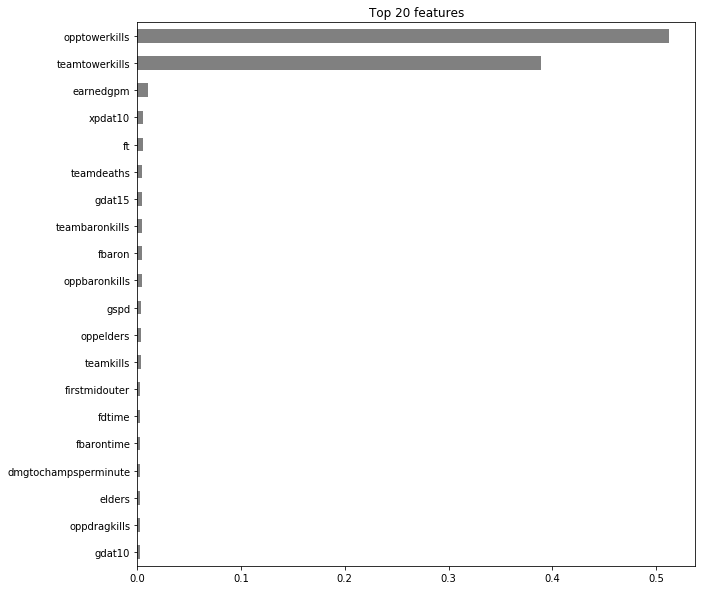

In [61]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

# We see here that tower kills are skewing the data.
# After I removed them, kills would skew the data.
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Trimming final_df2

In [0]:
final_df3 = 

## Running a Random Forest Classifier model on y dataframe

In [55]:
ytrain, ytest = train_test_split(y, test_size = .20, random_state = 42) # stratify?
ytrain.shape, ytest.shape

((9630, 34), (2408, 34))

In [56]:
ytrain, yval = train_test_split(ytrain, test_size = .20, random_state = 42)
ytrain.shape, yval.shape

((7704, 34), (1926, 34))

In [57]:
Xy_train = ytrain.drop(columns = target)
yy_train = ytrain[target]
Xy_val = yval.drop(columns = target)
yy_val = yval[target]
Xy_test = ytest.drop(columns = target)
yy_test = ytest[target]

Xy_train.shape, Xy_val.shape

((7704, 33), (1926, 33))

In [58]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs = -1)
)
pipeline.fit(Xy_train, yy_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['team', 'split'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'team',
                                          'data_type': dtype('O'),
                                          'mapping': Kingzone DragonX       1
AHQ e-Sports Club      2
Schalke 04             3
ROX Tigers             4
Cloud9                 5
                    ... 
Lowkey Esports       162
Mammoth              163
CJ Entus             164
Oyunhizmetleri       165
NaN                   -2
Length: 166, dtype: int64},...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_

In [59]:
yy_pred = pipeline.predict(Xy_val)
print('y DF set Validation accuracy: ',
      pipeline.score(Xy_val, yy_val)) # Leakage

y DF set Validation accuracy:  0.9724818276220145
